After looking at how the audio features correlate with popularity, a few patterns stand out.
Loudness has the strongest positive relationship with popularity followed by danceability and energy.
This means louder and more upbeat tracks tend to perform slightly better.
On the other side acousticness and instrumentalness show the strongest negative correlations.
This suggests that quieter acoustic or instrumental tracks are generally less popular.
Overall, the correlations are fairly small.
This implies that popularity is influenced by a mix of factors beyond just merely the audio characteristics in the dataset.

In [6]:
numeric.corr()["popularity"].sort_values(ascending=False)

popularity          1.000000
loudness            0.363011
danceability        0.256564
energy              0.248922
tempo               0.081039
valence             0.060076
duration_min        0.002348
speechiness        -0.151076
liveness           -0.167995
instrumentalness   -0.210983
acousticness       -0.381295
Name: popularity, dtype: float64

The heatmap gives a quick overview of how the audio features relate to each other.
Energy and loudness stand out with a strong positive correlation, which makes sense since louder songs usually feel more energetic. 
Acousticness shows the opposite trend and is strongly negative with both energy and loudness, reflecting how acoustic tracks tend to be softer and less intense. 
I also noticed that danceability, energy, and valence tend to rise together in general. 
Popularity doesn’t show any strong correlation with the features, suggesting that no single musical attribute is a major driver of popularity on its own.

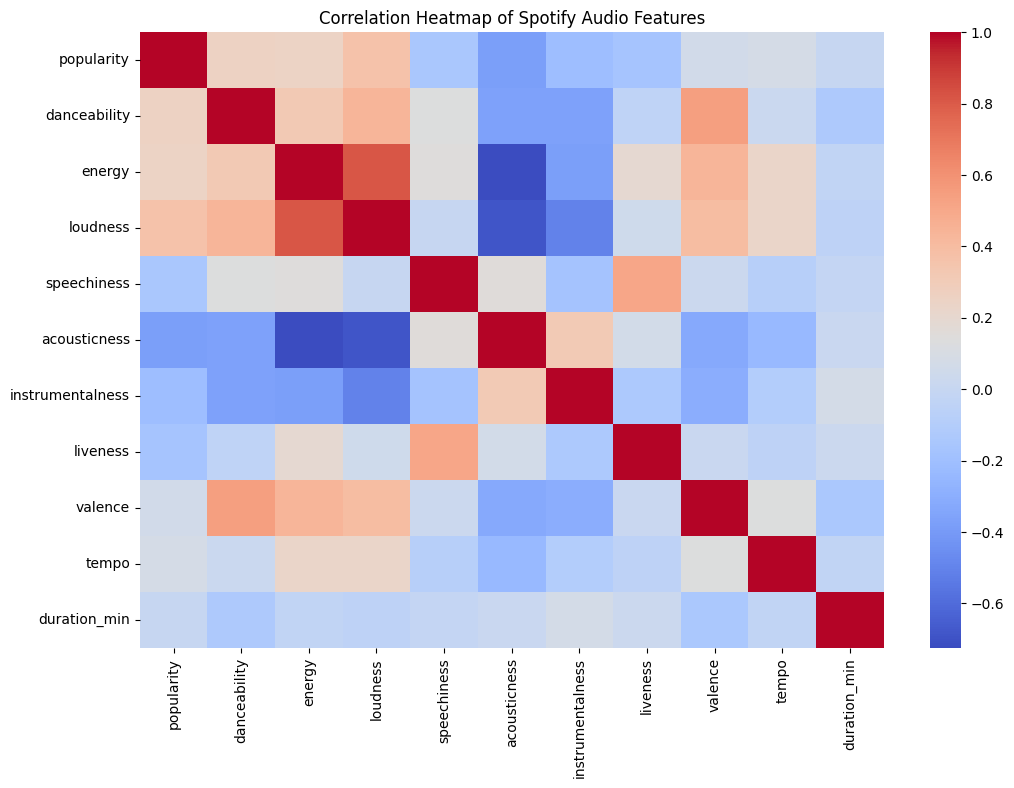

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric = df[[
    "popularity",
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "duration_min"
]]

plt.figure(figsize=(12, 8))
sns.heatmap(numeric.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Spotify Audio Features")
plt.show()


I calculated the mean popularity of the genres. 
This was to understand which types of music would generally perform better on Spotify. 
The results showed that modern genres such as Pop, Rap, Rock, and Hip-Hop all have the highest popularity above 58. 
The more niche or traditional genres such as Classical, Soundtrack, Blues, and World tended to have lower average popularity. 
This suggests that listener engagement on Spotify is strongly influenced by genre trends with the more contemporary styles attracting the most attention.

In [4]:
df.groupby("genre")["popularity"].mean().sort_values(ascending=False).head(20)

genre
Pop                 66.590667
Rap                 60.533795
Rock                59.619392
Hip-Hop             58.423131
Dance               57.275256
Indie               54.701561
Children’s Music    54.659040
R&B                 52.308719
Alternative         50.213430
Folk                49.940209
Soul                47.027836
Country             46.100416
Jazz                40.824383
Electronic          38.056095
Reggaeton           37.742915
Reggae              35.589328
World               35.524077
Blues               34.742879
Soundtrack          33.954800
Classical           29.282195
Name: popularity, dtype: float64

I reviewed the top genres in the dataset using value_counts().
The distribution is fairly balanced: the most common genre was Comedy with 9,681 tracks and the 20th most common genre which was Ska with 8,874 tracks are relatively close in size.
This indicates that no single genre dominates the dataset, which helps ensure that later analyses—such as popularity or audio feature comparisons across genres—won’t be heavily skewed by unequal representation.

In [3]:
df["genre"].value_counts().head(20)

genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Name: count, dtype: int64

I inspected the dataset using df.info() and df.describe() to confirm it loaded correctly and is ready for analysis.
The data contains 232,725 tracks and 20 columns, with no significant missing values.
All columns have appropriate data types, and the audio features such as danceability, energy, valence, etc. show healthy variation.
Popularity ranges from 0 to 100, and track durations are realistic on average.
Overall, the dataset appears clean and suitable for deeper exploration.

In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   genre              232725 non-null  object 
 1   artist_name        232725 non-null  object 
 2   track_name         232724 non-null  object 
 3   track_id           232725 non-null  object 
 4   popularity         232725 non-null  int64  
 5   duration_ms        232725 non-null  int64  
 6   danceability       232725 non-null  float64
 7   energy             232725 non-null  float64
 8   acousticness       232725 non-null  float64
 9   speechiness        232725 non-null  float64
 10  liveness           232725 non-null  float64
 11  instrumentalness   232725 non-null  float64
 12  loudness           232725 non-null  float64
 13  valence            232725 non-null  float64
 14  tempo              232725 non-null  float64
 15  key                232725 non-null  object 
 16  mo

,popularity,duration_ms,danceability,energy,acousticness,speechiness,liveness,instrumentalness,loudness,valence,tempo,duration_min
count,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,2.351223e+05,0.554364,0.570958,0.368560,0.120765,0.215009,0.148301,-9.569885,0.454917,117.666585,3.918706
std,18.189948,1.189359e+05,0.185608,0.263456,0.354768,0.185518,0.198273,0.302768,5.998204,0.260065,30.898907,1.982265
min,0.000000,1.538700e+04,0.056900,0.000020,0.000000,0.022200,0.009670,0.000000,-52.457000,0.000000,30.379000,0.256450
25%,29.000000,1.828570e+05,0.435000,0.385000,0.037600,0.036700,0.097400,0.000000,-11.771000,0.237000,92.959000,3.047617
50%,43.000000,2.204270e+05,0.571000,0.605000,0.232000,0.050100,0.128000,0.000044,-7.762000,0.444000,115.778000,3.673783
75%,55.000000,2.657680e+05,0.692000,0.787000,0.722000,0.105000,0.264000,0.035800,-5.501000,0.660000,139.054000,4.429467
max,100.000000,5.552917e+06,0.989000,0.999000,0.996000,0.967000,1.000000,0.999000,3.744000,1.000000,242.903000,92.548617


We start by importing the pandas library and loading the cleaned dataset produced by the ETL pipeline.
Using pd.read_csv() reads the processed CSV file into a DataFrame, and df.head() displays the first five rows.
This step confirms that the ETL pipeline worked correctly, the file path is valid, and the expected columns such as genre, artist_name, and the audio features are present before beginning the analysis.

In [1]:
import pandas as pd

df = pd.read_csv("../data/processed/spotify_clean.csv")
df.head()


,genre,artist_name,track_name,track_id,popularity,duration_ms,danceability,energy,acousticness,speechiness,liveness,instrumentalness,loudness,valence,tempo,key,mode,time_signature,duration_min,popularity_bucket
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,99373,0.389,0.910,0.611,0.0525,0.3460,0.000,-1.828,0.814,166.969,C#,Major,4/4,1.656217,low
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,137373,0.590,0.737,0.246,0.0868,0.1510,0.000,-5.559,0.816,174.003,F#,Minor,4/4,2.289550,low
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,170267,0.663,0.131,0.952,0.0362,0.1030,0.000,-13.879,0.368,99.488,C,Minor,5/4,2.837783,low
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,152427,0.240,0.326,0.703,0.0395,0.0985,0.000,-12.178,0.227,171.758,C#,Major,4/4,2.540450,low
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,82625,0.331,0.225,0.950,0.0456,0.2020,0.123,-21.150,0.390,140.576,F,Major,4/4,1.377083,low
